# Kaggle Competition

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.



Link - https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data <br/>
Git Link - https://github.com/Neelam-Singhal/Forecast_Sales_Kaggle_Competiton

In [27]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [28]:
sales_train = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')


## Test
final_test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [29]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.000,1.000
2935845,09.10.2015,33,25,7460,299.000,1.000
2935846,14.10.2015,33,25,7459,349.000,1.000
2935847,22.10.2015,33,25,7440,299.000,1.000
2935848,03.10.2015,33,25,7460,299.000,1.000


In [34]:
sales_train[sales_train.item_id == 22158]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2887746,14.10.2015,33,46,22158,249.000,1.000


In [40]:
items.item_category_id.nunique()


84

In [30]:
final_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [31]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.500
1,1,0.500
2,2,0.500
3,3,0.500
4,4,0.500


### Data Overview
1. [NIU] Shops -> total 60 shops
2. [NIU] Item_categories -> Total 84 item categories
3. [NIU after merging] Items -> Has item_id and item_category_id. Can be merged with Sales DF to get item_category

In [42]:
#Merging item cat id with sales data
sales_train = sales_train.merge(items[['item_id', 'item_category_id']], on='item_id')
sales_train = sales_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]
sales_train.date = pd.to_datetime(sales_train.date)

In [46]:
#
#sales_train_temp = pd.read_csv('sales_train.csv')

In [43]:
sales_train

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,37,22154,999.000,1.000
1,2013-01-23,0,24,37,22154,999.000,1.000
2,2013-01-20,0,27,37,22154,999.000,1.000
3,2013-02-01,0,25,37,22154,999.000,1.000
4,2013-03-01,0,25,37,22154,999.000,1.000
...,...,...,...,...,...,...,...
2935844,2015-10-17,33,25,40,8428,249.000,1.000
2935845,2015-01-10,33,25,15,7903,12198.000,1.000
2935846,2015-10-29,33,25,64,7610,2890.000,1.000
2935847,2015-10-22,33,25,64,7635,2100.000,1.000


# EDA

In [63]:
df = sales_train.copy()


In [64]:
# Data Clean
df = df[df.date.between('2013-01-01', '2015-10-31') ]
#df['month'] = df['date'].dt.month
#df['year'] = df['date'].dt.year
df = df.sort_values('date')

In [ ]:
# Dropping any data where item_cnt_day is negative (as these are ~0.24% of whole dataset)



In [72]:
df.sort_values('item_cnt_day').shape

(2896782, 7)

In [76]:
df[df.item_cnt_day < 0].shape[0]*100/df.shape[0]

0.24989799025263207

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df[(df.shop_id == 12) & (df.item_id == 8023)]['date'], df[(df.shop_id == 12) & (df.item_id == 8023)]['item_cnt_day'])

In [61]:
# # Try 1
# # Removing any negative item_cnt_day.

# df['item_cnt_day'] = df['item_cnt_day'].apply(lambda x : 0 if (x < 0) else x)
# df['item_price'] = df['item_price'].apply(lambda x : 0 if (x < 0) else x)

In [9]:
# Grouping data on monthly basis so it matches our final format
df_group = df.groupby(['date_block_num', 'shop_id', 'item_id']).agg({
    'item_category_id' : 'last', 
    'item_price':'max',
    'item_cnt_day':'sum'
    
}).reset_index()

In [10]:
df_group = df_group.sort_values('date_block_num')

In [11]:
df_group[df_group.item_id == 5822]

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day
42629,0,38,5822,35,999.000,7.000
40031,0,35,5822,35,999.000,2.000
41282,0,37,5822,35,999.000,9.000
46422,0,43,5822,35,999.000,8.000
47329,0,44,5822,35,999.000,4.000
...,...,...,...,...,...,...
1576742,33,28,5822,35,1149.000,12.000
1572572,33,22,5822,35,1149.000,6.000
1571680,33,21,5822,35,1149.000,6.000
1574099,33,25,5822,35,1149.000,13.000


In [12]:
df_group.describe()

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day
count,1593410.000,1593410.000,1593410.000,1593410.000,1593410.000,1593410.000
mean,14.527,32.804,10678.567,41.529,798.177,2.265
std,9.484,16.535,6238.709,16.317,1572.706,8.611
min,0.000,0.000,0.000,0.000,0.090,0.000
25%,6.000,21.000,5045.000,30.000,199.000,1.000
50%,14.000,31.000,10493.000,40.000,399.000,1.000
75%,22.000,47.000,16059.000,55.000,899.000,2.000
max,33.000,59.000,22169.000,83.000,307980.000,2252.000


In [13]:
df[df.item_cnt_day<0]

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day


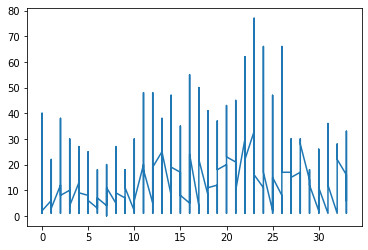

In [14]:
plt.plot(df_group[df_group.item_id == 5822].date_block_num, df_group[df_group.item_id == 5822].item_cnt_day)